In [5]:
!pip install requests

     |████████████████████████████████| 61 kB 48 kB/s  eta 0:00:01
     |████████████████████████████████| 153 kB 53 kB/s  eta 0:00:01
     |████████████████████████████████| 58 kB 475 kB/s eta 0:00:01
     |████████████████████████████████| 147 kB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 178 kB 37 kB/s  eta 0:00:01


In [41]:
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
import numpy as np

from neurodiffeq import diff      # the differentiation operation
from neurodiffeq.ode import solve # the ANN-based solver
from neurodiffeq.conditions import IVP   # the initial condition

from neurodiffeq.monitors import Monitor1D
from neurodiffeq.ode import solve_system

from neurodiffeq.networks import FCNN    # fully-connect neural network
from neurodiffeq.networks import SinActv  #sin activation

from neurodiffeq.solvers import Solver1D
from neurodiffeq.callbacks import MonitorCallback

from neurodiffeq.conditions import DirichletBVP2D
from neurodiffeq.solvers import Solver2D
from neurodiffeq.monitors import Monitor2D
from neurodiffeq.generators import Generator2D
import torch

from neurodiffeq.conditions import IBVP1D 
from neurodiffeq.pde import make_animation
import pickle
import pandas as pd
import dill
import json
import requests
from pprint import pprint
import os

# /solutions 

## Get a List of all the Solutions Present

In [27]:
URL = 'http://192.168.29.150:9000/v1/solutions'

r = requests.get(URL)

data = r.json()

pprint(data)

[{'desc': 'Non Auto System Equation',
  'id': 1,
  'name': 'joy_non_auto_sys',
  'path_to_file': 'model_storage/joy_non_auto_sys'},
 {'desc': 'Exponential Equation',
  'id': 2,
  'name': 'sathvik_exponential',
  'path_to_file': 'model_storage/sathvik_exponential'}]


# /solutions/{id}

## Get me a specific solution based on ID

In [28]:
URL = 'http://192.168.29.150:9000/v1/solutions/2'

r = requests.get(URL)

data = r.json()

pprint(data)

{'desc': 'Exponential Equation',
 'id': 2,
 'name': 'sathvik_exponential',
 'path_to_file': 'model_storage/sathvik_exponential'}


## Loading Exponential Equation Model by Satvik and fitting

In [53]:
#Load Model
loaded_solver = Solver1D.load(path='/app/'+data['path_to_file'])

# Fit the solver (i.e., train the neural networks)
loaded_solver.fit(max_epochs=1000, callbacks=[monitor_callback])

# Get the solution
solution = loaded_solver.get_solution()

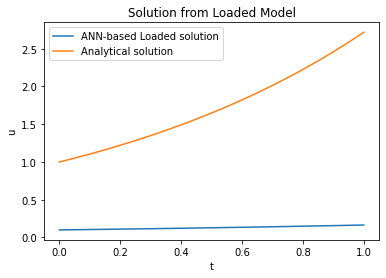

In [56]:
ts = np.linspace(0, 1.0, 100)
u_net_loaded = solution(ts, to_numpy=True)
u_ana = np.exp(ts)

plt.plot(ts, u_net_loaded, label='ANN-based Loaded solution')
plt.plot(ts, u_ana, label='Analytical solution')
plt.ylabel('u')
plt.xlabel('t')
plt.title('Solution from Loaded Model')
plt.legend();